<a href="https://colab.research.google.com/github/m0onsoo/movie_review/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/BA/data

/content/drive/MyDrive/Colab Notebooks/BA/data


In [ ]:
# data1 = pd.read_csv("data_1.csv", encoding='cp949')
# data4 = pd.read_csv("data_4.csv", encoding='cp949')
# data6 = pd.read_csv("data_6.csv", encoding='cp949')

for i in range(1, 12):
  globals()["data{}".format(i)] = pd.read_csv(f"data_{i}.csv", encoding='cp949')

# 데이터 탐색

In [ ]:
data1.head()

,user,title,year,genres,rating
0,1111119,범죄도시2,2022.0,"'액션', '범죄'",7
1,1111119,탑건: 매버릭,2022.0,"'액션', '드라마'",7
2,1111119,닥터 스트레인지: 대혼돈의 멀티버스,2022.0,"'액션', '모험', '판타지', 'SF', '공포'",8
3,1111119,불편한 진실,2006.0,'다큐멘터리',5
4,1111119,스파이더맨: 노 웨이 홈,2021.0,"'액션', '모험', '판타지', 'SF'",7


In [ ]:
data4.head()

,user,title,year,genres,rating
0,이동한,스즈메의 문단속,2022.0,"'액션', '모험', '애니메이션'",10
1,이동한,인사이드 아웃,2015.0,"'코미디', '드라마', '모험', '애니메이션', '가족', '판타지'",7
2,이동한,어벤져스: 엔드게임,2019.0,"'액션', '모험', 'SF'",8
3,이동한,12인의 노한 사람들,1997.0,"'드라마', '범죄'",9
4,이동한,스파이더맨: 뉴 유니버스,2018.0,"'코미디', '액션', '모험', 'SF', '애니메이션', '가족'",8


In [ ]:
data6.head()

,user,title,year,genres,rating
0,린린,가디언즈 오브 갤럭시: Volume 3,2023.0,"'액션', '코미디', '모험', 'SF'",10
1,린린,웅남이,2021.0,"'액션', '코미디'",3
2,린린,언어의 정원,2013.0,"'애니메이션', '드라마', '로맨스', '단편'",6
3,린린,스즈메의 문단속,2022.0,"'애니메이션', '액션', '모험'",8
4,린린,"귀멸의 칼날: 상현집결, 그리고 도공 마을로",2023.0,"'애니메이션', '공포', '액션', '판타지'",5


In [ ]:
data1['genres'].unique()

array(["'액션', '범죄'", "'액션', '드라마'", "'액션', '모험', '판타지', 'SF', '공포'", ...,
       "'판타지', '드라마', '모험', '로맨스', '액션', '스릴러'",
       "'드라마', '전쟁', '액션', '시대극'", "'로맨스', '드라마', '전쟁', '스릴러', '역사'"],
      dtype=object)

In [ ]:
data1.iloc[94][['title', 'genres']]

title     춤춰브라
genres     NaN
Name: 94, dtype: object

In [ ]:
data11.head()

,user,title,year,genres,rating
0,SG,인어공주,2023,"'판타지', '모험', '가족', '로맨스', '뮤지컬', '단편'",1
1,SG,돈,2018,'범죄',6
2,SG,가디언즈 오브 갤럭시: Volume 3,2023,"'코미디', '모험', '액션', 'SF'",9
3,SG,교섭,2022,"'범죄', '액션'",3
4,SG,존 윅 4,2023,"'범죄', '액션', '스릴러'",9


# df_to_genre_vector

In [ ]:
# 장르 리스트 생성

def df_to_genres(dfs):
  genres = []
  for df in dfs:
    for genre in df['genres']:
      if pd.isna(genre):
        # print(genre)
        continue
        # 장르가 없는 결측치 발견됨

      genre_list = genre.split(',')
      for g in genre_list:
          g = g.replace("'", '').replace(" " ,'')
          if g not in genres:
              genres.append(g)

  return genres

In [ ]:
dfs = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11]
genres = []

genres = df_to_genres(dfs)

In [ ]:
genres
print(len(genres))

33


In [ ]:
genres
# genres = ['액션',
#  '범죄',
#  '드라마',
#  '모험',
#  '판타지',
#  'SF',
#  '공포',
#  '다큐멘터리',
#  '코미디',
#  '가족',
#  '뮤지컬',
#  '로맨스',
#  '애니메이션',
#  '미스터리',
#  '스릴러',
#  '전기',
#  '음악',
#  '역사',
#  '전쟁',
#  '스포츠',
#  '재난',
#  '시대극',
#  '단편',
#  '키즈',
#  '로맨틱코미디',
#  '서부극',
#  '틴에이저',
#  'BL',
#  '성인',
#  '공연실황',
#  '예능',
#  'TV드라마',
#  '시사교양']

['액션',
 '범죄',
 '드라마',
 '모험',
 '판타지',
 'SF',
 '공포',
 '다큐멘터리',
 '코미디',
 '가족',
 '뮤지컬',
 '로맨스',
 '애니메이션',
 '미스터리',
 '스릴러',
 '전기',
 '음악',
 '역사',
 '전쟁',
 '스포츠',
 '재난',
 '시대극',
 '단편',
 '키즈',
 '로맨틱코미디',
 '서부극',
 '틴에이저',
 'BL',
 '성인',
 '공연실황',
 '예능',
 'TV드라마',
 '시사교양']

# 닉네임 추출

In [ ]:
def extract_nicknames(dfs):
  users = []
  for df in dfs:
    for user in df['user']:
      # if pd.isna(genre):
      #   # print(genre)
      #   continue
      #   # 장르가 없는 결측치 발견됨
      if user not in users:
        users.append(user)

  return users

In [ ]:
users = []

users = extract_nicknames(dfs)

In [ ]:
# users
len(users)

418

# 유저 장르별 평점 테이블 만들기

In [ ]:
# 새로운 테이블 생성
users_rating_by_genres = pd.DataFrame(columns=['User'] + genres)

def make_new_table(dfs, table):
  for i, user in enumerate(users):
    row = [user] + [0]*len(genres)
    table.loc[i] = row
    # 유저별 모든 장르에 대해 영벡터 만들기

def plus_rating(table, dfs):
  for df in dfs:
    for i in range(len(df)):
      genre = df.iloc[i]['genres']
      if pd.isna(genre):
        continue
        # 장르가 없는 결측치는 넘김 처리

      user = df.iloc[i]['user']
      genre_list = genre.split(',') # 한 영화에 여러 장르 존재
      rating = df.iloc[i]['rating'] # 해당 영화에 매긴 평점

      row_user = table['User'] == user
      for g in genre_list:
        g = g.replace("'", '').replace(" " ,'')
        table.loc[row_user, g] += rating
        # 장르별로 평점을 더해줌

In [ ]:
# data1.head()
data1['user'].unique()

array(['1111119', '욘디', '솜휘수', 'jellyk', '김미애', '서윤진', '지안', '펭제황귄',
       '함수린', '10시10분', 'jeongjinu', 'Blue', '비야', '신서영', '쩔미', 'moon',
       'Bruce Brothers', 'Ms April', '유수연', '들깨', '해환', '이소현',
       'SatelliteM', '순심이는참지않지', 'JiHye Kyung', '이설렘', '함성현', '김성호의 씨네만세',
       '미겔', '정화', '윤제아빠', '김보경', '심혜진', 'ajin', '신상훈남', '라지', '전강민',
       'Jeonghee Lee', '포카리', '김태형', '이예진', 'HGW XX/7'], dtype=object)

In [ ]:
# users
genres.index('스릴러')

14

In [ ]:
new = data1.iloc[0]['genres'].split(',')
for n in new:
  n = n.replace("'", "").replace(" ", "")
  print(n)

액션
범죄


In [ ]:
# data1.head()
data1[data1['user']=='욘디']

In [ ]:
users_rating_by_genres

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양


In [ ]:
make_new_table(dfs, users_rating_by_genres)

In [ ]:
plus_rating(users_rating_by_genres, dfs)
# 26분 소요

In [ ]:
users_rating_by_genres

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1111119,1481,845,2498,974,447,836,261,51,1049,...,40,109,39,11,0,0,0,0,0,0
1,욘디,1690,773,2591,1416,879,760,270,77,1837,...,149,342,28,162,6,0,0,0,0,0
2,솜휘수,3188,1278,3436,1954,1237,1277,537,99,2045,...,167,93,85,30,0,1,0,0,0,0
3,jellyk,982,476,1806,866,624,430,129,52,1104,...,92,131,16,36,0,0,0,0,0,0
4,김미애,1338,732,3072,873,785,406,891,72,1411,...,142,434,28,166,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,김준기,2908,646,2487,2250,1502,1828,404,35,1658,...,162,148,4,26,0,0,0,0,0,0
414,김가현,2584,1337,4964,2147,1643,1358,598,78,3359,...,208,509,81,111,0,9,16,0,0,0
415,Arcturus,2203,897,4228,1749,1211,1251,530,80,1877,...,139,261,78,117,0,0,0,9,0,0
416,븁븁,926,226,763,908,557,544,87,21,604,...,87,66,6,16,0,0,0,0,0,0


In [ ]:
# users_rating_by_genres.to_csv("URG_origin.csv", encoding="utf-8-sig")

# EDA

In [ ]:
org = pd.read_csv("URG_origin.csv")
org = org.iloc[:, 2:]

In [ ]:
org.head(3)

,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,가족,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1481,845,2498,974,447,836,261,51,1049,278,...,40,109,39,11,0,0,0,0,0,0
1,1690,773,2591,1416,879,760,270,77,1837,748,...,149,342,28,162,6,0,0,0,0,0
2,3188,1278,3436,1954,1237,1277,537,99,2045,945,...,167,93,85,30,0,1,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(org)

# 장르별로 본 횟수로 나눠줘서 장르별 평점 테이블 만들기

In [ ]:
def plus_count(table, dfs):
  for df in dfs:
    for i in range(len(df)):
      genre = df.iloc[i]['genres']
      if pd.isna(genre):
        continue
        # 장르가 없는 결측치는 넘김 처리

      user = df.iloc[i]['user']
      genre_list = genre.split(',') # 한 영화에 여러 장르 존재
      rating = df.iloc[i]['rating'] # 해당 영화에 매긴 평점

      row_user = table['User'] == user
      for g in genre_list:
        g = g.replace("'", '').replace(" " ,'')
        table.loc[row_user, g] += 1
        # 장르별로 평점을 더해줌


def divine_count(df_r, df_c, genres):
  # df_r : rating table, df_c : count_by_genre table
  new_table = df_r.copy() # rating copy

  for i in range(len(new_table)):
    for idx, g in enumerate(genres):
      if new_table.iloc[i, idx+1] == 0:
        continue
        # 아예 안본 영화(값이 0)이면 넘어감

      new_table.iloc[i, idx+1] /= df_c.iloc[i, idx + 1]
      # 장르별 총 평점을 장르당 영화 카운트로 나눠 장르별 평균 별점 구하기
      # 실수형으로 변환

  return new_table

In [ ]:
genres_count = pd.DataFrame(columns=['User'] + genres)

make_new_table(dfs, genres_count)

In [ ]:
genres_count.head()

In [ ]:
plus_count(genres_count, dfs)

In [ ]:
genres_count.head()

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1111119,246,135,394,158,73,133,45,7,163,...,6,18,6,2,0,0,0,0,0,0
1,욘디,282,129,413,214,133,115,48,12,295,...,19,57,4,26,1,0,0,0,0,0
2,솜휘수,569,228,618,324,211,221,110,20,333,...,22,17,12,5,0,1,0,0,0,0
3,jellyk,184,82,307,140,102,69,33,8,218,...,13,33,2,7,0,0,0,0,0,0
4,김미애,175,92,406,108,100,50,116,9,186,...,16,58,4,21,0,1,0,0,0,0


In [ ]:
genres_count.to_csv("genres_count.csv", encoding="utf-8-sig")

In [ ]:
avg_rating_genres = divine_count(users_rating_by_genres, genres_count, genres)
# 장르별 평균 평점 테이블 생성

In [ ]:
avg_rating_genres.head()

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1111119,6.020325,6.259259,6.340102,6.164557,6.123288,6.285714,5.800000,7.285714,6.435583,...,6.666667,6.055556,6.500000,5.500000,0.0,0.0,0.0,0.0,0,0
1,욘디,5.992908,5.992248,6.273608,6.616822,6.609023,6.608696,5.625000,6.416667,6.227119,...,7.842105,6.000000,7.000000,6.230769,6.0,0.0,0.0,0.0,0,0
2,솜휘수,5.602812,5.605263,5.559871,6.030864,5.862559,5.778281,4.881818,4.950000,6.141141,...,7.590909,5.470588,7.083333,6.000000,0.0,1.0,0.0,0.0,0,0
3,jellyk,5.336957,5.804878,5.882736,6.185714,6.117647,6.231884,3.909091,6.500000,5.064220,...,7.076923,3.969697,8.000000,5.142857,0.0,0.0,0.0,0.0,0,0
4,김미애,7.645714,7.956522,7.566502,8.083333,7.850000,8.120000,7.681034,8.000000,7.586022,...,8.875000,7.482759,7.000000,7.904762,0.0,4.0,0.0,0.0,0,0


In [ ]:
avg_rating_genres.to_csv("user_avg_rating_by_genres.csv", encoding="utf-8-sig")

# 유저별 레이팅의 합으로 나눠줘서 총합이 1이되게


In [ ]:
def standardzation(table, genres):
  new_table = table.copy()
  total = list(new_table.iloc[:,1:].sum(axis = 1))

  for i in range(len(table)):
    for idx, g in enumerate(genres):
      new_table.iloc[i, idx+1] /= total[i]
      # 실수형으로 변환

  return new_table

In [ ]:
new = standardzation(users_rating_by_genres, genres)

In [ ]:
new

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1111119,0.117848,0.067240,0.198775,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,...,0.003183,0.008674,0.003103,0.000875,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,욘디,0.103706,0.047435,0.158996,0.086892,0.053940,0.046637,0.016568,0.004725,0.112727,...,0.009143,0.020987,0.001718,0.009941,0.000368,0.000000,0.000000,0.000000,0.0,0.0
2,솜휘수,0.144051,0.057747,0.155257,0.088292,0.055894,0.057702,0.024265,0.004473,0.092404,...,0.007546,0.004202,0.003841,0.001356,0.000000,0.000045,0.000000,0.000000,0.0,0.0
3,jellyk,0.097064,0.047050,0.178511,0.085598,0.061678,0.042503,0.012751,0.005140,0.109123,...,0.009094,0.012949,0.001581,0.003558,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,김미애,0.081675,0.044683,0.187523,0.053290,0.047918,0.024783,0.054389,0.004395,0.086131,...,0.008668,0.026492,0.001709,0.010133,0.000000,0.000244,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,김준기,0.149036,0.033108,0.127460,0.115314,0.076978,0.093686,0.020705,0.001794,0.084973,...,0.008303,0.007585,0.000205,0.001333,0.000000,0.000000,0.000000,0.000000,0.0,0.0
414,김가현,0.091547,0.047368,0.175866,0.076065,0.058209,0.048112,0.021186,0.002763,0.119004,...,0.007369,0.018033,0.002870,0.003933,0.000000,0.000319,0.000567,0.000000,0.0,0.0
415,Arcturus,0.100939,0.041100,0.193723,0.080137,0.055487,0.057320,0.024284,0.003666,0.086002,...,0.006369,0.011959,0.003574,0.005361,0.000000,0.000000,0.000000,0.000412,0.0,0.0
416,븁븁,0.135917,0.033172,0.111992,0.133275,0.081755,0.079847,0.012770,0.003082,0.088654,...,0.012770,0.009687,0.000881,0.002348,0.000000,0.000000,0.000000,0.000000,0.0,0.0


csv export 필요

In [ ]:
# new.to_csv("user_rating.csv")
# 저장 완료

In [ ]:
new_t = users_rating_by_genres[:10].copy()

total = list(new_t.iloc[:,1:].sum(axis = 1))
print(total)
# test

[12567, 16296, 22131, 10117, 16382, 7632, 30154, 17883, 5641, 9080]


유저별로 모든 장르 평점의 합이 1이 되도록 표준화해주는 작업 필요 (완)

# 클러스터링 K-means (divine 유저별 별점 총합)
#### 군집 간의 거리가 너무 가까운 결과 발생

In [ ]:
X = new.iloc[:, 1:] # 클러스터링 전에 유저정보 지우기

In [ ]:
X.head()

,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,가족,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,0.117848,0.067240,0.198775,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,0.022121,...,0.003183,0.008674,0.003103,0.000875,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.103706,0.047435,0.158996,0.086892,0.053940,0.046637,0.016568,0.004725,0.112727,0.045901,...,0.009143,0.020987,0.001718,0.009941,0.000368,0.000000,0.0,0.0,0.0,0.0
2,0.144051,0.057747,0.155257,0.088292,0.055894,0.057702,0.024265,0.004473,0.092404,0.042700,...,0.007546,0.004202,0.003841,0.001356,0.000000,0.000045,0.0,0.0,0.0,0.0
3,0.097064,0.047050,0.178511,0.085598,0.061678,0.042503,0.012751,0.005140,0.109123,0.047741,...,0.009094,0.012949,0.001581,0.003558,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.081675,0.044683,0.187523,0.053290,0.047918,0.024783,0.054389,0.004395,0.086131,0.030277,...,0.008668,0.026492,0.001709,0.010133,0.000000,0.000244,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# test

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


test

In [ ]:
test_data = [[0]*len(genres)]
test_data[0][genres.index('액션')] += 0.7
test_data[0][genres.index('범죄')] += 0.3

In [ ]:
kmeans.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

n회번째 kmeans

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(5, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

# 모델 훈련 + 이너셔 저장 (이너셔는 쓰지는 않을듯)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

# 실루엣 계수 저장

In [ ]:
import matplotlib.pyplot as plt

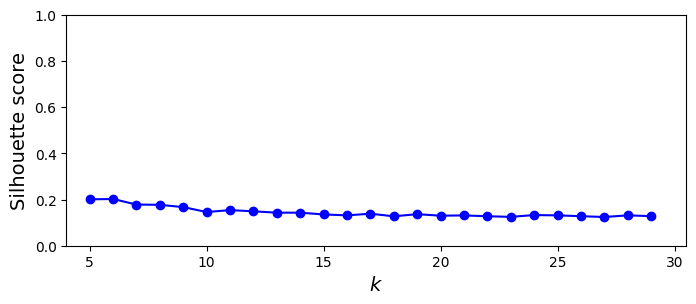

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(5, 30), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([4, 30.5, 0, 1])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

# k별로 실루엣 계수 그래프
# 레인지 변경 필요

더 큰 군집 생성

In [ ]:
kmeans_per_k2 = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(40, 100)]
# inertias = [model.inertia_ for model in kmeans_per_k]

# 모델 훈련 + 이너셔 저장 (이너셔는 쓰지는 않을듯)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silhouette_scores2 = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k2]

# 실루엣 계수 저장

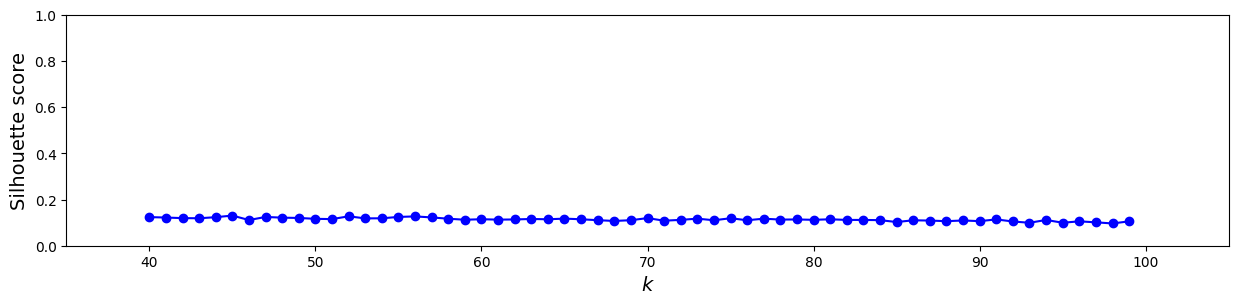

In [ ]:
plt.figure(figsize=(15, 3))
plt.plot(range(40, 100), silhouette_scores2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([35, 105, 0, 1])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

# k별로 실루엣 계수 그래프
# 0에 가까울수록 근처 군집과 가까움. 클러스터를 아무리 늘려도 실루엣 계수가 변하지 않음

1~5로 확인

In [ ]:
kmeans_per_k3= [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 6)]
# inertias = [model.inertia_ for model in kmeans_per_k]

# 모델 훈련 + 이너셔 저장 (이너셔는 쓰지는 않을듯)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silhouette_scores3 = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k3[1:]]

# 실루엣 계수 저장

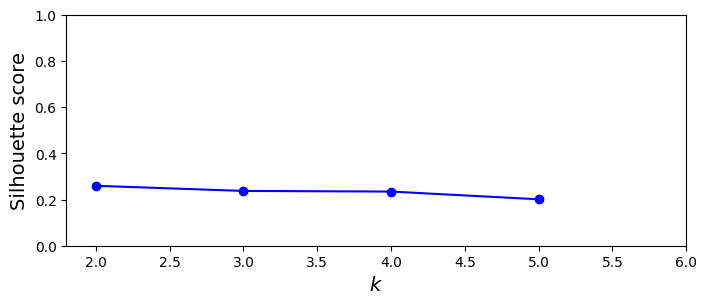

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 6), silhouette_scores3, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 6, 0, 1])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

# k별로 실루엣 계수 그래프
# 0에 가까울수록 근처 군집과 가까움. 클러스터를 아무리 늘려도 실루엣 계수가 변하지 않음

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

# k별로 실루엣 다이어그램

# 클러스터링 K-means (divine 장르별 -> 장르별 평균 평점)
#### 진행하지 않음

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(5, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

# 모델 훈련 + 이너셔 저장 (이너셔는 쓰지는 않을듯)

In [ ]:
silhouette_scores3 = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k3[1:]]

# 실루엣 계수 저장

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 6), silhouette_scores3, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 6, 0, 1])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

# k별로 실루엣 계수 그래프
# 0에 가까울수록 근처 군집과 가까움. 클러스터를 아무리 늘려도 실루엣 계수가 변하지 않음

# PCA

아예 비어있는 컬럼이 꽤 있다.
PCA없이 클러스터링 했을 때 군집 간의 거리가 너무 가까운 것 같아서
차원축소를 해준다면 거리를 멀어지게 해줄 수 있지 않을까 싶다.

장르별 평균평점으로 스케일을 [0, 10]으로 맞춰주고 나서 PCA를 적용하면
불필요한 변수를 줄일 수 있을 듯 싶다.

In [ ]:
data = pd.read_csv("user_rating_sum_one.csv")
data.drop(columns='Unnamed: 0', inplace = True)

X = data.iloc[:, 1:]

In [ ]:
X[:2]

,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,가족,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,0.117848,0.067240,0.198775,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,0.022121,...,0.003183,0.008674,0.003103,0.000875,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.103706,0.047435,0.158996,0.086892,0.053940,0.046637,0.016568,0.004725,0.112727,0.045901,...,0.009143,0.020987,0.001718,0.009941,0.000368,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

# pca = PCA(n_components = 2)
# X2D = pca.fit_transform(aaa)

In [ ]:
# X는 user_rating_sum_one.csv
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
X_reduced = pca.fit_transform(X)
# 분산 0.9 유지하면서 차원축소

In [ ]:
print(X_reduced)
print("남은 변수 개수 =", len(X_reduced[0]))

[[ 0.00469291 -0.0528579   0.0059861  -0.00829538  0.01665392]
 [-0.02168988  0.02636558  0.00797366 -0.01046247 -0.00207472]
 [-0.04975369 -0.01522107 -0.00981724 -0.00745561  0.01692638]
 ...
 [ 0.00507596  0.0081466  -0.01227884  0.00310616  0.00381563]
 [-0.10245888  0.02129634 -0.02172747 -0.02462846 -0.00296343]
 [-0.06780021 -0.016799   -0.02842218 -0.03685849  0.03630601]]
남은 변수 개수 = 5


# t-sne (차원축소와 시각화)

In [ ]:
# data = pd.read_csv("user_rating_sum_one.csv")
# data.drop(columns='Unnamed: 0', inplace = True)

In [ ]:
data.head(3)

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1111119,0.117848,0.067240,0.198775,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,...,0.003183,0.008674,0.003103,0.000875,0.000000,0.000000,0.0,0.0,0.0,0.0
1,욘디,0.103706,0.047435,0.158996,0.086892,0.053940,0.046637,0.016568,0.004725,0.112727,...,0.009143,0.020987,0.001718,0.009941,0.000368,0.000000,0.0,0.0,0.0,0.0
2,솜휘수,0.144051,0.057747,0.155257,0.088292,0.055894,0.057702,0.024265,0.004473,0.092404,...,0.007546,0.004202,0.003841,0.001356,0.000000,0.000045,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# X = data.iloc[:, 1:]

tsne = TSNE(n_components=2)
# transformed = tsne.fit_transform(X)
transformed_pca = tsne.fit_transform(X_reduced)
# PCA로 분산 보존된 데이터 넣기

In [ ]:
transformed

In [ ]:
transformed_pca

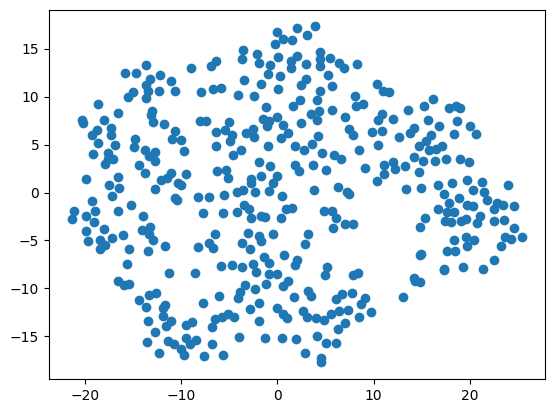

In [ ]:
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.show()

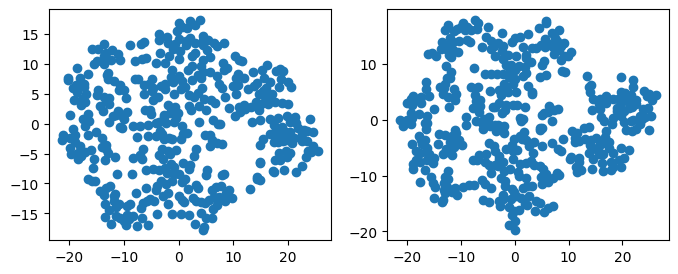

In [ ]:
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8,3))
# fig.suptitle('Life expectancy by Year by Region')

ax = axes[0] # row, column
ax.scatter(transformed[:,0], transformed[:,1])

ax = axes[1] # row, column
ax.scatter(transformed_pca[:,0], transformed_pca[:,1])

# ax.set_xlabel(f'year by {region}')
# ax.set_ylabel('Mean_Life Expectancy')

plt.show()

차원축소에서 선형의 경우 pca유리, 비선형의 경우 t-sne 유리.
선형인지 비선형인지 모르므로 t-sne를 선택해서 2차원으로 축소

일반 t-sne와 pca로 90% 분산 보존 후 t-sne를 거쳤을 때 pca거친 것이 더 잘보이는 것을 확인할 수 있음

In [ ]:
axes

array([<Axes: >, <Axes: >], dtype=object)

<ipython-input-33-40ed162f480f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=transformed[:,0], y=transformed[:,1], legend='full', palette=palette)


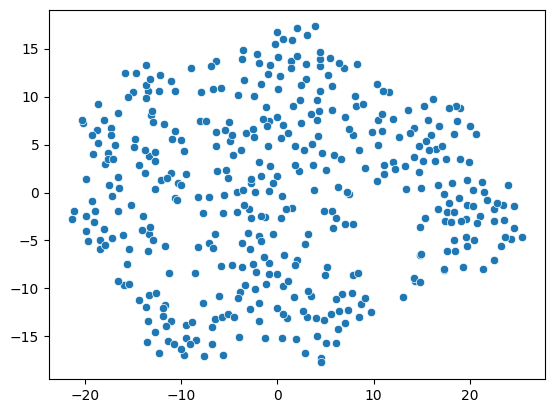

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 10)
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], legend='full', palette=palette)
plt.show()

# DBSCAN (군집 간 거리가 가까울 때 효과적)

In [ ]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
dbscan = DBSCAN(eps=1.7, min_samples=4)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
dbscan.fit(transformed_pca)

DBSCAN(eps=1.7, min_samples=4)

In [ ]:
labels = dbscan.labels_
print(labels)
print("군집 개수 =", len(set(labels)))

[ 0  1  2  1 13  3  4  5  4  1  6  7  8  1 11 -1  9  4  4  8  9  8  1  7
 10  1 10  9  0 -1  9  3 11 12  8  5 10 13 -1 -1  1  4  4  0 17  4 -1  4
 -1 -1 10 -1  4 16 -1 18  0  0  4  2  1  9  1  4  9  6 -1  1  1  1 14 11
  4 -1  3  4  4  1  3 -1  0  9  1  5  3  9  1 15  3 -1  5 -1  0  2  4  5
  7 11 -1  4  0  0  1  4  4  5  0 15  0  6  9  8  1  2  8 -1  9  8  8 15
 15  4  4  6 12 14  6  5  5  8 14  6  6  8  9  0 -1  4  0  8  1  4 16 -1
  1  3  8  1 18  9 15 13  6  0  3  0 15  9  2  0  2 -1  3 -1  0 15  8 -1
  6  5 14 13 -1 -1 -1  4  0  6 10 14 -1  4  5  0 14  0 16  2  1  6  0  9
 -1 -1  9 15  4 -1 17  7 -1  7 -1 -1 17  4  5 -1  4  1  3  7 -1 18  6  3
  3 11  4 11  1  3 17  3  0  7  8 -1  7  7 -1 -1  0 15  9  4  1  9  2  1
  1 16  4 10  9  7  3 12 10  4 -1  7  4  3  0 -1 -1 -1 -1  8  4  3  7  1
 -1  4  7  7  7  4  1 -1  1  1 -1  6  3  4  2 10  1  0  1  3  9  4  1  1
  4 11  4 11  7  3 11  9 16  4  4 17  1 17  8 -1  1 11 -1 18  3  6  9  3
  4 -1  0 14 11  1  4  6  0  1  1 14  3  0  4  9  8

<ipython-input-15-520fb70462ca>:5: UserWarning: The palette list has more values (30) than needed (20), which may not be intended.
  sns.scatterplot(x=transformed_pca[:,0], y=transformed_pca[:,1], hue = labels, legend='full', palette=palette)


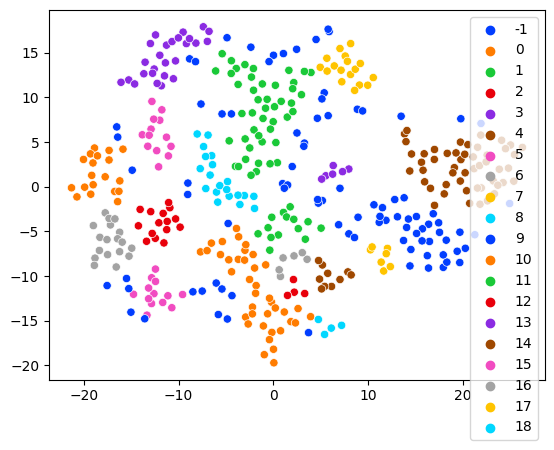

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 30)
sns.scatterplot(x=transformed_pca[:,0], y=transformed_pca[:,1], hue = labels, legend='full', palette=palette)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(transformed_pca, dbscan.labels_)

0.2011713

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-148-5ceec22eff16>", line 36, in <cell line: 36>
    plt.axvline(x=silhouette_score, color="red", linestyle="--")
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py", line 2425, in axvline
    return gca().axvline(x=x, ymin=ymin, ymax=ymax, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py", line 837, in axvline
    scalex = (xx < xmin) or (xx > xmax)
TypeError: '>' not supported between instances of 'float' and 'function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute 

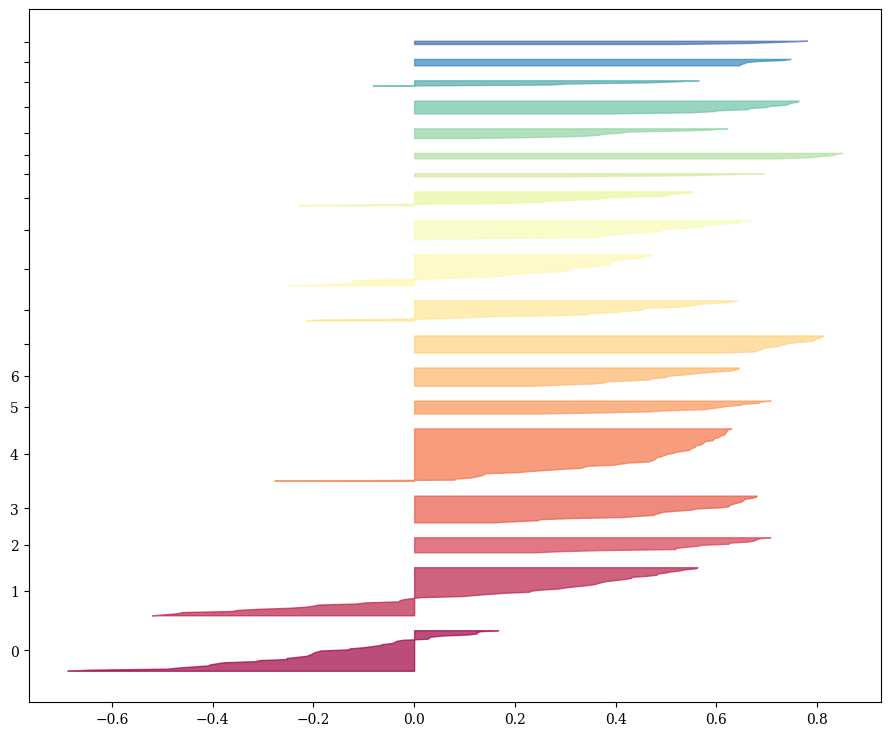

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))




y_pred = dbscan.labels_
silhouette_coefficients = silhouette_samples(transformed_pca, y_pred)

padding = len(X) // 30
pos = padding
ticks = []
for i in range(19):
    coeffs = silhouette_coefficients[y_pred == i]
    coeffs.sort()

    color = mpl.cm.Spectral(i / 19)
    plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ticks.append(pos + len(coeffs) // 2)
    pos += len(coeffs) + padding

plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(range(19)))
# if k in (3, 5):
#     plt.ylabel("Cluster")

# if k in (5, 6):
#     plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#     plt.xlabel("Silhouette Coefficient")
# else:
#     plt.tick_params(labelbottom=False)

plt.axvline(x=silhouette_score, color="red", linestyle="--")
# plt.title("$k={}$".format(k), fontsize=16)


plt.show()

In [ ]:
import pickle
import joblib

joblib.dump(dbscan, 'dbscan_clustering.pkl')

['dbscan_clustering.pkl']

## 최적의 하이퍼파라미터를 찾기
각 데이터 포인트의 kNN(k-Nearest Neighbors) 거리를 계산하고 이를 정렬하여 변곡점을 찾아 epsilon으로 선택

데이터의 밀도에 따라 적절한 epsilon 값을 선택할 수 있으며, 군집 간의 거리 문제를 완화할 수 있습니다.

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 데이터 포인트
# transformed_pca # 데이터 배열 (n_samples, n_features)

# kNN 거리 계산을 위한 k 값
k = 4

# NearestNeighbors 모델 생성 및 kNN 거리 계산
nn = NearestNeighbors(n_neighbors=k+1)
nn.fit(transformed_pca)
distances, _ = nn.kneighbors(transformed_pca)

# 각 데이터 포인트의 kNN 거리를 정렬하여 변곡점 찾기
knn_distances = np.sort(distances[:, -1])  # 마지막 열은 자기 자신이므로 제외
differences = np.diff(knn_distances)
# differences = np.diff(knn_distances, n=2, axis=0)
kkk = np.diff(differences)
# threshold = np.argmax(differences) + 1  # 변곡점의 인덱스
threshold = np.argmax(np.abs(differences))


# 변곡점 찾기

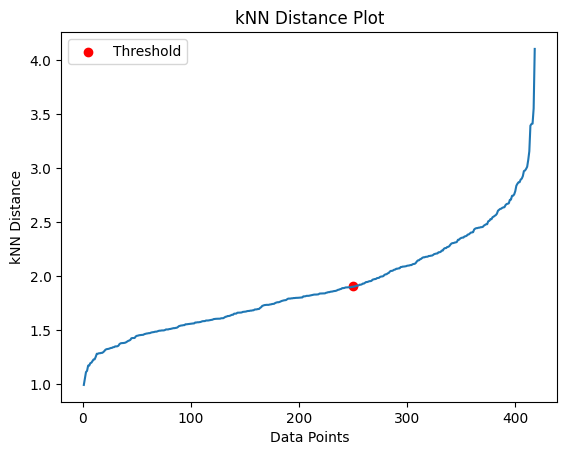

1.9059383429744778


In [ ]:
# 변곡점 시각화
plt.plot(range(1, len(knn_distances)+1), knn_distances)
plt.xlabel('Data Points')
plt.ylabel('kNN Distance')
plt.title('kNN Distance Plot')
# plt.scatter(threshold, knn_distances[threshold-1], color='r', label='Threshold')
plt.scatter(250, knn_distances[250], color='r', label='Threshold') # 값이 이상해서 임의 지정
plt.legend()
plt.show()

# 선택한 epsilon 값
# epsilon = knn_distances[threshold]
epsilon = knn_distances[250]

# epsilon 값을 DBSCAN에 적용하여 군집화 수행
# ...
print(knn_distances[250])

[변곡점 그래프로 epsilon 찾기](https://dive-into-ds.tistory.com/5)
참고

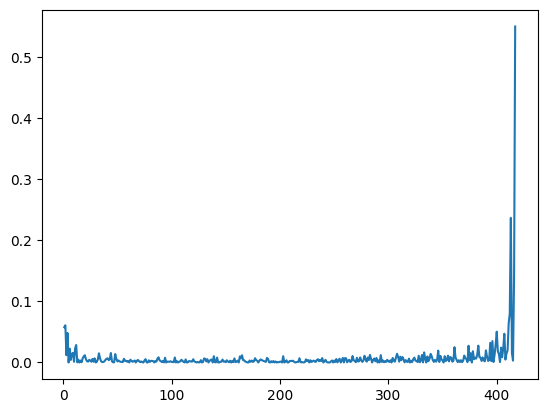

In [ ]:
# 도함수 시각화
plt.plot(range(1, len(differences)+1), differences)

plt.show()

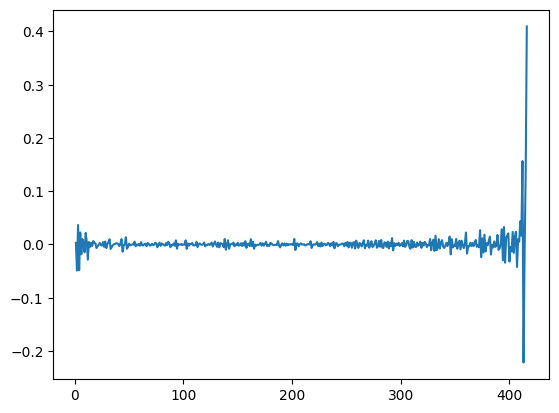

In [ ]:
# 이계도함수 시각화
plt.plot(range(1, len(kkk)+1), kkk)

plt.show()

# 그룹 속성 알아보기

In [ ]:
grp0 = data[dbscan.labels_ == 0]
# 0번 군집의 원본 데이터들
# data는 user_one_sum.csv

In [ ]:
# X_recovered = tsne.inverse_transform(X_reduced)
grp0[:5]

,User,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1111119,0.117848,0.067240,0.198775,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,...,0.003183,0.008674,0.003103,0.000875,0.0,0.000000,0.000000,0.000000,0.0,0.0
28,미겔,0.138721,0.065610,0.202023,0.059772,0.040934,0.044159,0.021655,0.002003,0.094732,...,0.002919,0.012898,0.002308,0.002851,0.0,0.000679,0.000000,0.000000,0.0,0.0
43,김수현,0.126768,0.062568,0.181175,0.083515,0.050598,0.071001,0.018770,0.000000,0.066376,...,0.002176,0.015506,0.001088,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
56,Lim inseop,0.122592,0.056527,0.182234,0.073250,0.043619,0.051249,0.019139,0.004451,0.089146,...,0.007630,0.013289,0.002035,0.003497,0.0,0.000000,0.000000,0.000000,0.0,0.0
57,김하빈,0.147254,0.071206,0.172064,0.065964,0.045469,0.038115,0.017874,0.004514,0.083565,...,0.005861,0.003750,0.005734,0.002348,0.0,0.000036,0.000328,0.000127,0.0,0.0


In [ ]:
grp = []
grp.append(data[dbscan.labels_ == 0])
grp[0].iloc[:5, 1:]

,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,가족,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,0.117848,0.067240,0.198775,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,0.022121,...,0.003183,0.008674,0.003103,0.000875,0.0,0.000000,0.000000,0.000000,0.0,0.0
28,0.138721,0.065610,0.202023,0.059772,0.040934,0.044159,0.021655,0.002003,0.094732,0.022843,...,0.002919,0.012898,0.002308,0.002851,0.0,0.000679,0.000000,0.000000,0.0,0.0
43,0.126768,0.062568,0.181175,0.083515,0.050598,0.071001,0.018770,0.000000,0.066376,0.010881,...,0.002176,0.015506,0.001088,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
56,0.122592,0.056527,0.182234,0.073250,0.043619,0.051249,0.019139,0.004451,0.089146,0.032873,...,0.007630,0.013289,0.002035,0.003497,0.0,0.000000,0.000000,0.000000,0.0,0.0
57,0.147254,0.071206,0.172064,0.065964,0.045469,0.038115,0.017874,0.004514,0.083565,0.031599,...,0.005861,0.003750,0.005734,0.002348,0.0,0.000036,0.000328,0.000127,0.0,0.0


In [ ]:
grp0 = grp[0].iloc[:5, 1:]
grp0.mean().sort_values(ascending=False)[:3].index

Index(['드라마', '액션', '스릴러'], dtype='object')

In [ ]:
dbscan.labels_

In [ ]:
grp = []
for i in range(19):
  grp.append(data[dbscan.labels_ == i]) # 리스트에 그룹 저장

In [ ]:
for i in range(19):
  top3 = grp[i].iloc[:, 1:].mean().sort_values(ascending=False)[:3].index
  print(f'grp{i} =', top3)

grp0 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp1 = Index(['드라마', '코미디', '액션'], dtype='object')
grp2 = Index(['드라마', '액션', '모험'], dtype='object')
grp3 = Index(['드라마', '모험', '코미디'], dtype='object')
grp4 = Index(['드라마', '코미디', '로맨스'], dtype='object')
grp5 = Index(['드라마', '액션', '코미디'], dtype='object')
grp6 = Index(['액션', '드라마', '스릴러'], dtype='object')
grp7 = Index(['드라마', '코미디', '로맨스'], dtype='object')
grp8 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp9 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp10 = Index(['액션', '드라마', '모험'], dtype='object')
grp11 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp12 = Index(['드라마', '스릴러', '액션'], dtype='object')
grp13 = Index(['드라마', '코미디', '스릴러'], dtype='object')
grp14 = Index(['드라마', '스릴러', '액션'], dtype='object')
grp15 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp16 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp17 = Index(['드라마', '액션', '스릴러'], dtype='object')
grp18 = Index(['드라마', '액션', '스릴러'], dtype='object')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

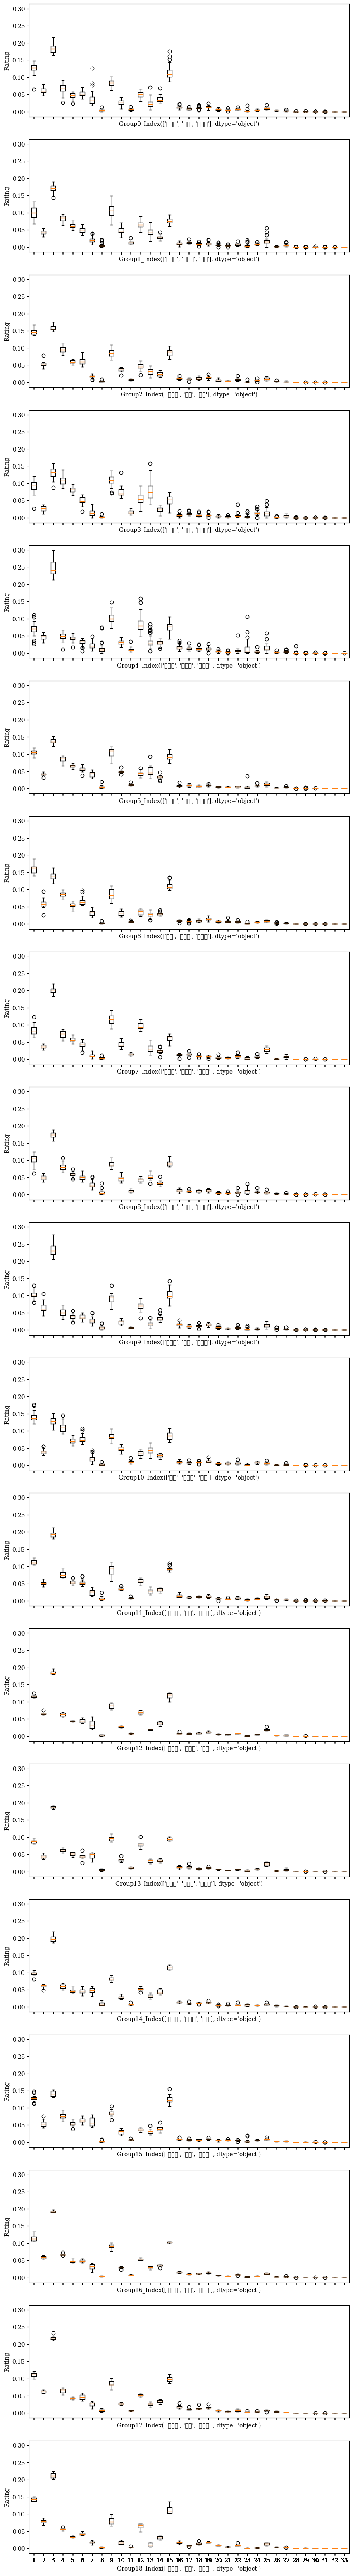

In [ ]:
# labels

fig, axes = plt.subplots(
    nrows=19, ncols=1,
    sharex=True,
    sharey=True,
    figsize=(10,80))
# fig.suptitle('Life expectancy by Year by Region')

for i in range(19):
  ax = axes[i]
  ax.boxplot(grp[i].iloc[:, 1:])

  top3 = grp[i].iloc[:, 1:].mean().sort_values(ascending=False)[:3].index

  ax.set_xlabel(f'Group{i}_{top3}')
  ax.set_ylabel('Rating')
  # print(top3)

plt.show()

In [ ]:
import matplotlib as mpl

plt.rcParams['font.family'] = 'DejaVu Serif'
print(mpl.rcParams['font.family'])

['DejaVu Serif']


In [ ]:
import matplotlib as mpl
print(mpl.get_cachedir())

/root/.cache/matplotlib


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rc('font', family = 'DejaVu Serif')
grp0.boxplot()
plt.show()
# 한글 나오지 않음

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmmi10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'cmtt10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmss10',
 'STIXGeneral',
 'STIXGeneral',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Serif',
 'Humor Sans',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 '

# 그룹 0, 1, 3, 4, 9

In [ ]:
grp0_users = grp[0]['User'].values
for user in grp0_users:
  print(user, end=' ')

1111119 미겔 김수현 Lim inseop 김하빈 카메라 크로크무슈 나쁜영화 WatchCat Niknik 김도훈 평론가 filmaholic9 천성식 문성준 Ben 르네채 나쁜피 조용환 lemonade 유지철 방쌤 차칸수니리 동진 이원빈 이준성 살벌한놈 Random cul 언논논 윤준 konimoji 박상환 김일국 쿠퍼쿠퍼 미코 Horenso Zelrick 아리아드네 김태욱 정진영 

In [ ]:
# for df in dfs:
#   grp0_users = grp[0]['User'].values

for user in grp0_users:
  # print(user, end=' ')
  for df in dfs:
    row1 = data1[data1['user'] == user]
    row2 = row1['rating'] >= 8
    row2 =row1[row2]

  print(user, row2['title'], row2['rating'])

# 그룹에서 가장 빈도 높은 영화 추출

1111119 2      닥터 스트레인지: 대혼돈의 멀티버스
12                      소울
14              원더 우먼 1984
16                  소리도 없이
21                    라라랜드
              ...         
665              마이너리티 리포트
668                     타짜
669                    메멘토
671                 비긴 어게인
673                 다크 나이트
Name: title, Length: 157, dtype: object 2       8
12      8
14      8
16      9
21      9
       ..
665     9
668     8
669     8
671     9
673    10
Name: rating, Length: 157, dtype: int64
미겔 24864    극장판 귀멸의 칼날: 무한열차편
24874          콰이어트 플레이스 2
24889          다만 악에서 구하소서
24899      님아, 그 강을 건너지 마오
24902                   거인
               ...        
26441               19곰 테드
26442                건축학개론
26445               굿 윌 헌팅
26447                  의형제
26450              본 슈프리머시
Name: title, Length: 565, dtype: object 24864     8
24874     9
24889     8
24899     8
24902     8
         ..
26441     8
26442     8
26445     8
26447     8
26450    10
Name: rating, Length: 565, dtype:

In [ ]:
row1 = data1[data1['user'] == '욘디']
row2 = row1['rating'] >= 8

row1[row2]

,user,title,year,genres,rating
675,욘디,가디언즈 오브 갤럭시: Volume 3,2023.0,"'코미디', '액션', '모험', 'SF'",8
677,욘디,킬링 로맨스,2021.0,'코미디',8
682,욘디,서치 2,2023.0,"'드라마', '스릴러'",8
685,욘디,애프터썬,2022.0,'드라마',8
686,욘디,바빌론,2022.0,"'드라마', '코미디', '역사'",8
...,...,...,...,...,...
1531,욘디,"좋은 놈, 나쁜 놈, 이상한 놈",2008.0,"'코미디', '액션', '서부극'",8
1533,욘디,명탐정 코난: 베이커가의 망령,2002.0,'애니메이션',9
1539,욘디,A-특공대,2010.0,"'스릴러', '액션', '코미디', '모험'",8
1558,욘디,왕의 남자,2005.0,"'드라마', '시대극', '역사'",8


In [ ]:
(data1['rating'] >= 8)

0        False
1        False
2         True
3        False
4        False
         ...  
43587    False
43588     True
43589    False
43590     True
43591    False
Name: rating, Length: 43592, dtype: bool

# 표준화 전 차원축소해보면 어떨까 (무시해도 됨)



In [ ]:
org = pd.read_csv("URG_origin.csv")
org = org.iloc[:, 2:]
org.head(3)

,액션,범죄,드라마,모험,판타지,SF,공포,다큐멘터리,코미디,가족,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,1481,845,2498,974,447,836,261,51,1049,278,...,40,109,39,11,0,0,0,0,0,0
1,1690,773,2591,1416,879,760,270,77,1837,748,...,149,342,28,162,6,0,0,0,0,0
2,3188,1278,3436,1954,1237,1277,537,99,2045,945,...,167,93,85,30,0,1,0,0,0,0


In [ ]:
tsne_org = TSNE(n_components=2)
transformed_org = tsne_org.fit_transform(org)

In [ ]:
transformed_org

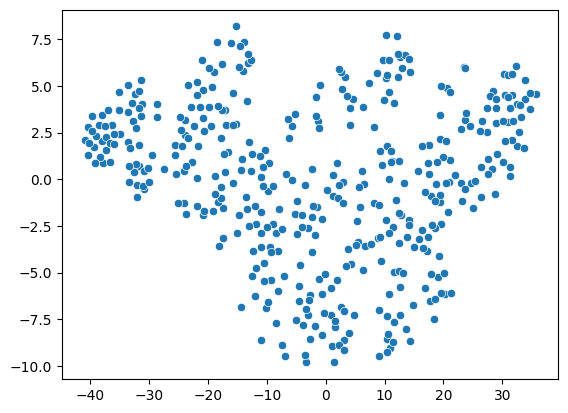

In [ ]:
sns.scatterplot(x=transformed_org[:,0], y=transformed_org[:,1])
plt.show()

In [ ]:
dbscan2 = DBSCAN(eps=1.3, min_samples=4)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
dbscan2.fit(transformed_org)

DBSCAN(eps=1.3, min_samples=4)

In [ ]:
labels2 = dbscan2.labels_
print(labels2)
print("군집 개수 =", len(set(labels2)))

[19  0  4  1 -1  2  3  0  2  2  4 -1  5  0  5  5 -1  6  7  5 -1 -1  0  8
  5  1 -1  9 -1 -1 10  5 11 31 29 24  5 12  2 13  2  9  7  5  1 -1  1  1
  0  1  5 13  7 28  1 14 -1 15  6 26 15  2  0  2 30 19  0 16 -1 13 11 17
 -1  1  2 -1  7 18  2 19 14 -1  0 -1  5  1 16 20 24 21  4 -1 14 22  3 -1
  1 11  5 23 -1 27  5 10 23 -1 30  4 17 -1  1 16 -1  2 29  1 10 23 16 20
 -1  6 10  4  5 10  4  2 -1 11 11  4 20 16 10 -1  4 -1 22 -1 11 23 11  2
 16 24 10  8 10 10 21 11 -1 10  2 22 -1 -1  4 -1 -1 21  1  9 11  4 27 -1
 -1 -1 -1  1 -1 10  5  3 25 21 -1 11 11 10 26 11 10 14 -1 19 19 21 10 10
 17 10 -1 21 -1  1 28  6  5  2 18 10 10  6 26  7 10 11  2 15 21 -1  4 -1
 -1 -1  1 11 15  5 -1 -1 27  2 11 -1  5 18  2 -1 19  4 10 23 13  9 -1  0
 -1 10  7 -1  5  8 24 31 -1 10  1 18 10  2 14  2  2  5  7 17  6 -1  1 19
  2  7 18  5  8  5  1  5  5  0  1 -1  1  5 -1 -1 18 17 -1  2 12  6  1  0
  3 11  3 10 -1 -1  5 10 11 23 11 10 13 28 -1 10  0 15 27 28  2 -1 13 -1
  3 -1 19 -1 16 16 23  4 14 17 10 30 -1 16  6 10 25

<ipython-input-227-12a96a4402d6>:5: UserWarning: The palette list has more values (35) than needed (33), which may not be intended.
  sns.scatterplot(x=transformed_org[:,0], y=transformed_org[:,1], hue = labels2, legend='full', palette=palette)


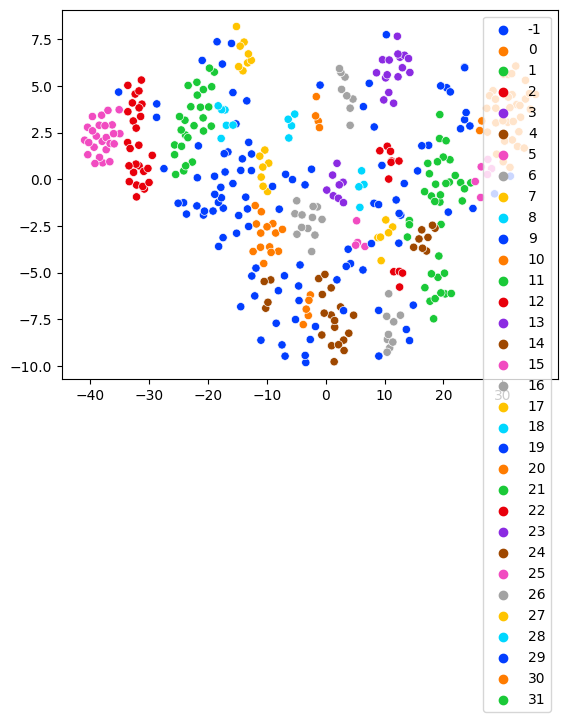

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 35)
sns.scatterplot(x=transformed_org[:,0], y=transformed_org[:,1], hue = labels2, legend='full', palette=palette)
plt.show()

# PCA 하고 난 후 DBSCAN을 적용하고 t-sne로 2차원 시각화를 하면?
## 나중에 다시 시도

In [ ]:
from sklearn.decomposition import PCA

data = pd.read_csv("user_rating_sum_one.csv")
data.drop(columns='Unnamed: 0', inplace = True)

X = data.iloc[:, 1:]

pca = PCA(n_components = 0.9)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced[0]

array([ 0.00469291, -0.0528579 ,  0.0059861 , -0.00829538,  0.01665392])

하이퍼파라미터 찾기

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 데이터 포인트
# X_reduced # 데이터 배열 (n_samples, n_features)

# kNN 거리 계산을 위한 k 값
k = 7 # 5차원 + 2

# NearestNeighbors 모델 생성 및 kNN 거리 계산
nn2 = NearestNeighbors(n_neighbors=k+1)
nn2.fit(X_reduced)
distances2, _ = nn2.kneighbors(X_reduced)

# 각 데이터 포인트의 kNN 거리를 정렬하여 변곡점 찾기
knn_distances2 = np.sort(distances2[:, -1])  # 마지막 열은 자기 자신이므로 제외
differences2 = np.diff(knn_distances2)
# differences = np.diff(knn_distances, n=2, axis=0)
kkk = np.diff(differences2)
threshold = np.argmax(differences2) + 1  # 변곡점의 인덱스
# threshold = np.argmax(np.abs(differences2))


# 변곡점 찾기

In [ ]:
epsilon = knn_distances2[threshold]
knn_distances2[threshold]

0.5060348135309463

In [ ]:
# 변곡점 시각화
plt.plot(range(1, len(knn_distances)+1), knn_distances)
plt.xlabel('Data Points')
plt.ylabel('kNN Distance')
plt.title('kNN Distance Plot')
# plt.scatter(threshold, knn_distances[threshold-1], color='r', label='Threshold')
plt.scatter(250, knn_distances[250], color='r', label='Threshold') # 값이 이상해서 임의 지정
plt.legend()
plt.show()

# 선택한 epsilon 값
# epsilon = knn_distances[threshold]
epsilon = knn_distances[250]

# epsilon 값을 DBSCAN에 적용하여 군집화 수행
# ...
print(knn_distances[250])

In [ ]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
dbscan2 = DBSCAN(eps=3, min_samples=3)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
dbscan2.fit(X_reduced)

DBSCAN(eps=3, min_samples=3)

t-sne

In [ ]:
# X = data.iloc[:, 1:]

tsne_last = TSNE(n_components=2)
transformed_last = tsne_last.fit_transform(X_reduced)
# PCA로 분산 보존된 데이터 넣기

In [ ]:
labels_last = dbscan2.labels_
print(labels_last)
print("군집 개수 =", len(set(labels_last)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
군집 개수 = 1


<ipython-input-61-e6e5b88c431a>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=transformed_last[:,0], y=transformed_last[:,1], hue = labels_last, legend='full', palette=palette)


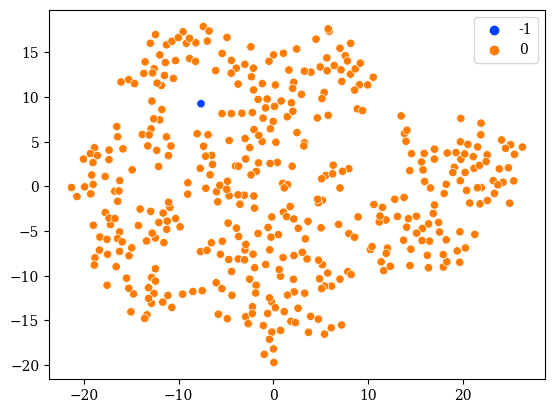

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 10)
sns.scatterplot(x=transformed_last[:,0], y=transformed_last[:,1], hue = labels_last, legend='full', palette=palette)
plt.show()

# kmeans again

In [ ]:
import pandas as pd

data = pd.read_csv("user_rating_sum_one.csv")
data.drop(columns='Unnamed: 0', inplace = True)
data.drop(columns='드라마', inplace = True) # 드라마 종속이 너무 강한것 같아서 제외해봄

X = data.iloc[:, 1:]

In [ ]:
X.head(3)

,액션,범죄,모험,판타지,SF,공포,다큐멘터리,코미디,가족,뮤지컬,...,키즈,로맨틱코미디,서부극,틴에이저,BL,성인,공연실황,예능,TV드라마,시사교양
0,0.117848,0.067240,0.077505,0.035569,0.066523,0.020769,0.004058,0.083473,0.022121,0.008594,...,0.003183,0.008674,0.003103,0.000875,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.103706,0.047435,0.086892,0.053940,0.046637,0.016568,0.004725,0.112727,0.045901,0.013378,...,0.009143,0.020987,0.001718,0.009941,0.000368,0.000000,0.0,0.0,0.0,0.0
2,0.144051,0.057747,0.088292,0.055894,0.057702,0.024265,0.004473,0.092404,0.042700,0.005739,...,0.007546,0.004202,0.003841,0.001356,0.000000,0.000045,0.0,0.0,0.0,0.0


In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        # axs[ind].set_ylim([0, len(sil_values) + 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced

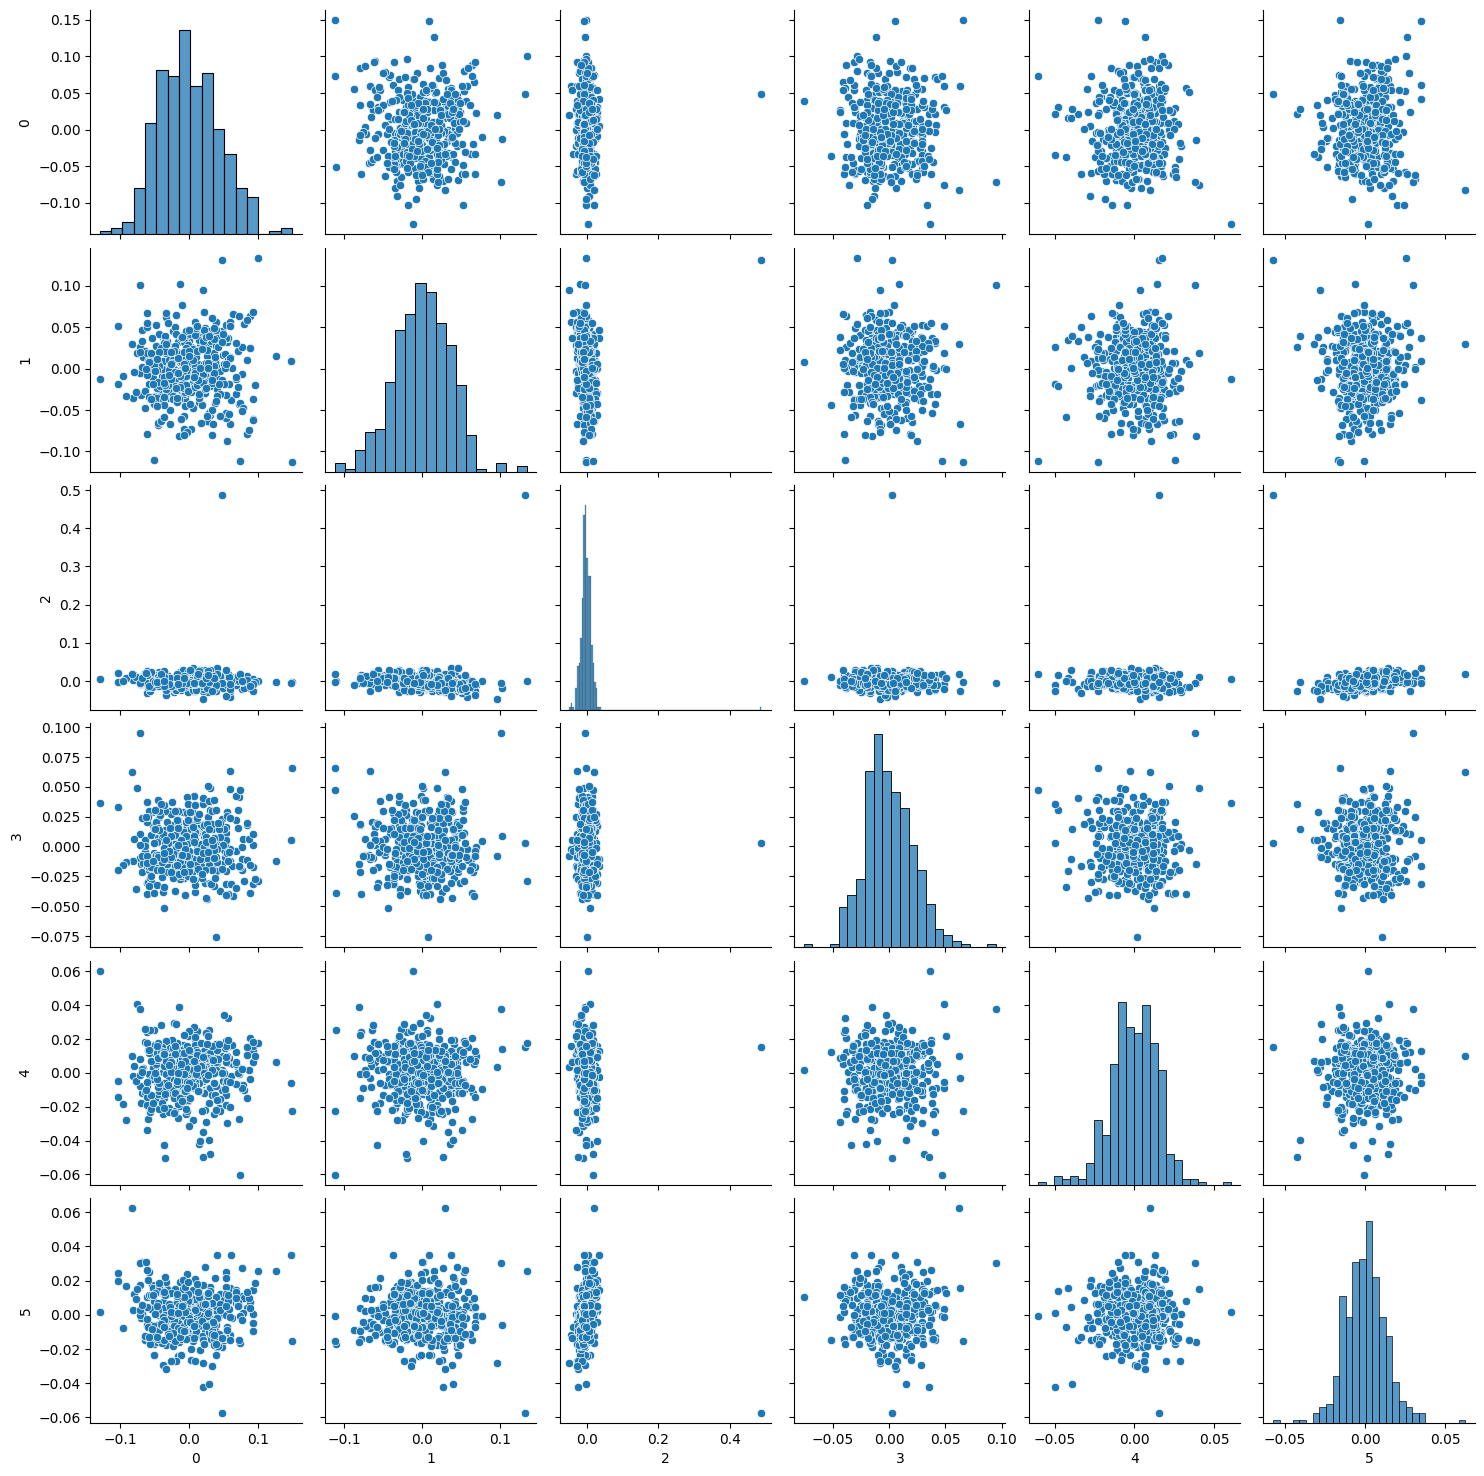

In [ ]:
sns.pairplot(tmp)

In [ ]:
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_3d[0], X_3d[1], X_3d[2], color = , marker='o', s=15, cmap='Greens')

# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


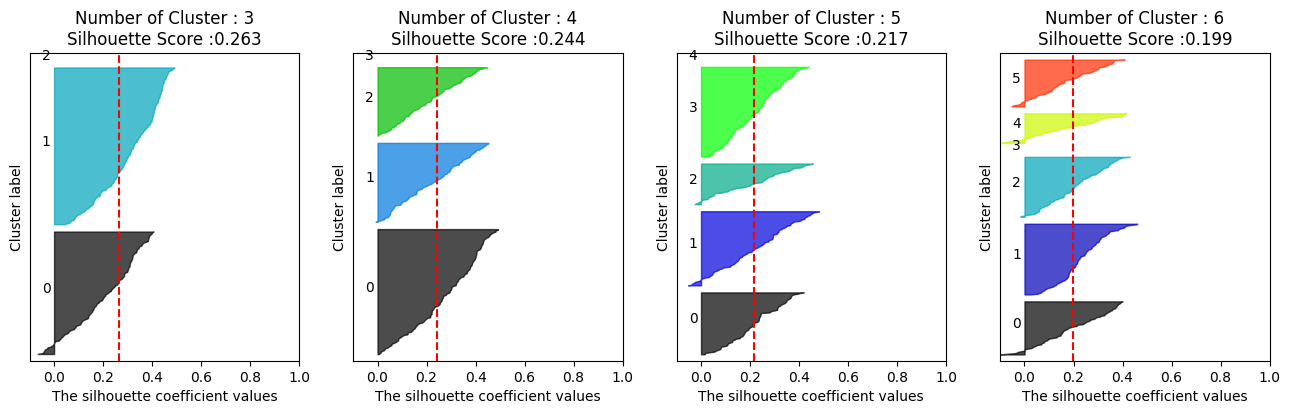

In [ ]:
visualize_silhouette([3,4,5,6], X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


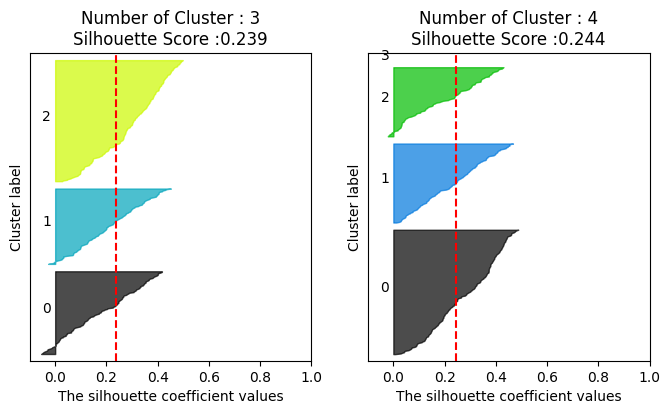

In [ ]:
visualize_silhouette([3,4], X_reduced)

In [ ]:
from sklearn.cluster import KMeans
# PCA된 데이터로 군집화

clusterer = KMeans(n_clusters = 3, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# X = data.iloc[:, 1:]
data = pd.read_csv("user_rating_sum_one.csv")
data.drop(columns='Unnamed: 0', inplace = True)
# data.drop(columns='드라마', inplace = True) # 드라마 종속이 너무 강한것 같아서 제외해봄
# 드라마 포함 pca 모양 맞춰주려고
X = data.iloc[:, 1:]

pca = PCA(n_components = 0.9)
X_reduced = pca.fit_transform(X)


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
# transformed = tsne.fit_transform(X)
transformed_pca = tsne.fit_transform(X_reduced)
# PCA로 분산 보존된 데이터 넣기

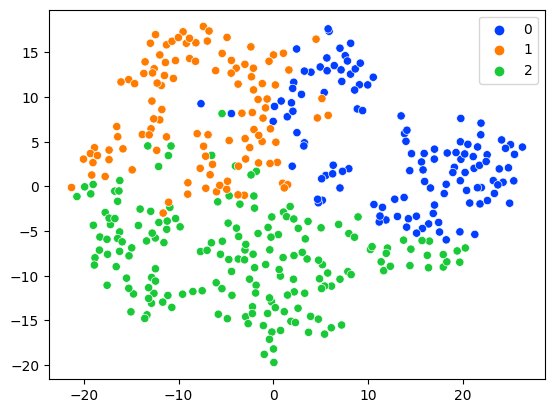

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 3)
sns.scatterplot(x=transformed_pca[:,0], y=transformed_pca[:,1], hue = cluster_labels, legend='full', palette=palette)
plt.show()

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
px.scatter(transformed_pca[:, 0], transformed_pca[:, 1], color = cluster_labels)

In [ ]:
for i in range(3):
  print(f'group{i} =', data[cluster_labels==i].iloc[:, 1:].mean().sort_values(ascending=False)[:3].index)

group0 = Index(['코미디', '로맨스', '액션'], dtype='object')
group1 = Index(['액션', '코미디', '모험'], dtype='object')
group2 = Index(['액션', '스릴러', '코미디'], dtype='object')


In [ ]:
cluster_labels

array([2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2,
       1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2,
       0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0,

# 3그룹 특성

In [ ]:
for i in range(3):
  print(f'group{i} =', data[cluster_labels==i].iloc[:, 1:].mean().sort_values(ascending=False)[:3].index)

# 파이플롯 그리고 싶음

group0 = Index(['코미디', '로맨스', '액션'], dtype='object')
group1 = Index(['액션', '코미디', '모험'], dtype='object')
group2 = Index(['액션', '스릴러', '코미디'], dtype='object')


In [ ]:
for i in range(3):
  gg = data[cluster_labels==i]
  gg.to_csv(f"group{i}_users.csv")

In [ ]:
import matplotlib.pyplot as plt


# fig, axes = plt.subplots(
#     nrows=1, ncols=3,
#     figsize=(12,3))
# fig.suptitle('Life expectancy by Year by Region')

for i in range(3):
  # ax = axes[i] # row, column
  pp = data[cluster_labels==i].iloc[:, 1:].mean().sort_values(ascending=False)
  plt.pie(pp.values, labels = genres.index(str(pp.index)))
  plt.show()

In [ ]:
data[cluster_labels==i].iloc[:, 1:].mean().sort_values(ascending=False).values

array([1.08818794e-01, 8.27214191e-02, 8.03503922e-02, 7.87109158e-02,
       5.71720638e-02, 4.73444892e-02, 4.55734481e-02, 3.82787428e-02,
       3.50210208e-02, 3.18538179e-02, 2.88076563e-02, 2.24328083e-02,
       1.90320186e-02, 1.36502660e-02, 1.28572148e-02, 1.12943531e-02,
       1.02772005e-02, 1.01645518e-02, 8.45961201e-03, 7.82783866e-03,
       7.35546010e-03, 5.49407753e-03, 5.33170256e-03, 5.21395598e-03,
       3.29551967e-03, 2.20167427e-03, 2.43421572e-04, 2.18609033e-04,
       1.25289248e-04, 4.93169136e-05, 7.05840605e-06, 1.08648549e-06])

In [ ]:
grp0 = data[cluster_labels == 0]
grp1 = data[cluster_labels == 1]
grp2 = data[cluster_labels == 2]

In [ ]:
print("group0 num =", len(grp0))
print("group1 num =", len(grp1))
print("group2 num =", len(grp2))

group0 num = 124
group1 num = 113
group2 num = 181


In [ ]:
grp0_users = grp0['User'].values
grp1_users = grp1['User'].values
grp2_users = grp2['User'].values
# for user in grp0_users:
#   print(user, end=' ')

In [ ]:
grp0_users = pd.read_csv("group0_users.csv")
grp1_users = pd.read_csv("group1_users.csv")
grp2_users = pd.read_csv("group2_users.csv")

grp0_users = grp0_users['User'].values
grp1_users = grp1_users['User'].values
grp2_users = grp2_users['User'].values

In [ ]:
grp0_users.head(3)

AttributeError: ignored

In [ ]:
# dfs = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11]

# result1 = pd.concat(dfs, ignore_index=True)

In [ ]:
# result1.to_csv("all_watcha.csv")
import pandas as pd
result1 = pd.read_csv("all_watcha.csv")

In [ ]:
len(result1)

615854

In [ ]:
counter = {}
for user in grp0_users:
  row1 = result1[result1['user'] == user]
  # row2 = row1['rating'] >= 8

  for film in row1['title']:
    if film not in counter:
        counter[film] = 0
    counter[film] += 1

# 그룹에서 가장 빈도 높은 영화 추출

In [ ]:
counter1={}
for user in grp1_users:
  row1 = result1[result1['user'] == user]
  # row2 = row1['rating'] >= 8


  for film in row1['title']:
    if film not in counter1:
        counter1[film] = 0
    counter1[film] += 1

In [ ]:
counter2 = {}

for user in grp2_users:
  row1 = result1[result1['user'] == user]
  # row2 = row1['rating'] >= 8

  for film in row1['title']:
    if film not in counter2:
        counter2[film] = 0
    counter2[film] += 1

In [ ]:
sorted(counter.items(), key=lambda x: x[1], reverse=True)[:50]
# 0: 코미디 로맨스 액션

[('미녀와 야수', 173),
 ('알라딘', 163),
 ('괴물', 146),
 ('라이온 킹', 138),
 ('하녀', 123),
 ('그녀', 123),
 ('올드보이', 122),
 ('위플래쉬', 120),
 ('스파이', 119),
 ('마스터', 119),
 ('나를 찾아줘', 118),
 ('타이타닉', 116),
 ('인생은 아름다워', 115),
 ('시간을 달리는 소녀', 114),
 ('피아니스트', 112),
 ('겨울왕국', 112),
 ('아가씨', 112),
 ('써니', 111),
 ('도둑들', 111),
 ('건축학개론', 110),
 ('인셉션', 110),
 ('어바웃 타임', 109),
 ('센과 치히로의 행방불명', 109),
 ('라라랜드', 109),
 ('이터널 선샤인', 108),
 ('신데렐라', 107),
 ('수상한 그녀', 107),
 ('미녀는 괴로워', 107),
 ('하울의 움직이는 성', 107),
 ('설국열차', 107),
 ('베테랑', 106),
 ('인사이드 아웃', 106),
 ('암살', 106),
 ('킹스맨 : 시크릿 에이전트', 106),
 ('인터스텔라', 106),
 ('광해, 왕이 된 남자', 106),
 ('왕의 남자', 105),
 ('뮬란', 105),
 ('악마는 프라다를 입는다', 105),
 ('업', 104),
 ('주토피아', 103),
 ('500일의 썸머', 103),
 ('기생충', 103),
 ('렛 미 인', 103),
 ('트루먼 쇼', 103),
 ('그랜드 부다페스트 호텔', 103),
 ('마더', 103),
 ('클래식', 102),
 ('부산행', 102),
 ('비긴 어게인', 102)]

In [ ]:
sorted(counter1.items(), key=lambda x: x[1], reverse=True)[:50]
# 1: 액션 코미디 모험

[('미녀와 야수', 167),
 ('알라딘', 154),
 ('라이온 킹', 134),
 ('이상한 나라의 앨리스', 111),
 ('괴물', 111),
 ('센과 치히로의 행방불명', 109),
 ('겨울왕국', 108),
 ('하울의 움직이는 성', 107),
 ('시간을 달리는 소녀', 106),
 ('라따뚜이', 104),
 ('뮬란', 104),
 ('인사이드 아웃', 103),
 ('라푼젤', 103),
 ('인셉션', 103),
 ('토이 스토리', 102),
 ('아이언맨 3', 102),
 ('위플래쉬', 101),
 ('인터스텔라', 101),
 ('어벤져스', 101),
 ('해리포터와 마법사의 돌', 101),
 ('아이언맨', 101),
 ('쿵푸팬더', 100),
 ('신데렐라', 100),
 ('설국열차', 100),
 ('해리포터와 비밀의 방', 100),
 ('찰리와 초콜릿 공장', 100),
 ('업', 100),
 ('아바타', 99),
 ('킹스맨 : 시크릿 에이전트', 99),
 ('아이언맨 2', 99),
 ('니모를 찾아서', 98),
 ('어벤져스: 에이지 오브 울트론', 97),
 ('토이 스토리 2', 97),
 ('스파이', 96),
 ('토이 스토리 3', 96),
 ('어바웃 타임', 96),
 ('닥터 스트레인지', 95),
 ('주토피아', 95),
 ('레미제라블', 95),
 ('나 홀로 집에', 95),
 ('해리포터와 불의 잔', 94),
 ('슈렉', 94),
 ('도둑들', 94),
 ('미이라', 93),
 ('가디언즈 오브 갤럭시', 93),
 ('몬스터 주식회사', 93),
 ('신비한 동물사전', 92),
 ('해리포터와 아즈카반의 죄수', 92),
 ('써니', 92),
 ('인크레더블', 92)]

In [ ]:
sorted(counter2.items(), key=lambda x: x[1], reverse=True)[:50]
# 3: 액션 스릴러

[('미이라', 239),
 ('괴물', 237),
 ('알라딘', 236),
 ('라이온 킹', 232),
 ('올드보이', 228),
 ('미녀와 야수', 221),
 ('고질라', 216),
 ('스파이', 205),
 ('토탈 리콜', 194),
 ('나를 찾아줘', 192),
 ('로보캅', 192),
 ('마스터', 189),
 ('위플래쉬', 181),
 ('킹스맨 : 시크릿 에이전트', 177),
 ('도둑들', 175),
 ('신세계', 175),
 ('인셉션', 175),
 ('베테랑', 174),
 ('어벤져스', 174),
 ('다크 나이트', 174),
 ('쏘우', 174),
 ('타짜', 172),
 ('타이타닉', 172),
 ('설국열차', 171),
 ('헌트', 171),
 ('아이언맨', 170),
 ('매트릭스', 169),
 ('인터스텔라', 169),
 ('엣지 오브 투모로우', 169),
 ('아바타', 169),
 ('아저씨', 168),
 ('매드맥스: 분노의 도로', 167),
 ('아이언맨 3', 167),
 ('살인의 추억', 167),
 ('다크 나이트 라이즈', 167),
 ('판타스틱 4', 167),
 ('인생은 아름다워', 166),
 ('숨바꼭질', 166),
 ('범죄와의 전쟁 : 나쁜놈들 전성시대', 166),
 ('더 게임', 166),
 ('겨울왕국', 165),
 ('부산행', 165),
 ('나 홀로 집에', 165),
 ('월드워Z', 165),
 ('추격자', 165),
 ('암살', 164),
 ('터널', 164),
 ('곡성(哭聲)', 164),
 ('어벤져스: 에이지 오브 울트론', 164),
 ('트랜스포머', 164)]

In [ ]:
## Counter Test
#   grp0_users = grp[0]['User'].values
# import collections
# collections.Counter(list1)

counter_test = {}
for user in grp0_users:
  row1 = result1[result1['user'] == user]
  row2 = row1
  # 단일 유저가 평가한 영화만

  for film, genre in zip(row2['title'], row2['genres']):
    if pd.isna(genre):
      continue # 장르가 없는 결측치

    genres = []
    genre_list = genre.split(',')
    for g in genre_list:
        g = g.replace("'", '').replace(" " ,'')
        if g not in genres:
            genres.append(g)

    if '코미디' in genres or '로맨스' in genres:
      if film not in counter_test:
          counter_test[film] = 0
      counter_test[film] += 1
      # print(film, genre)

# 그룹에서 가장 빈도 높은 영화 추출


find = result1[result1['name'].isin(grp0_users)]

In [ ]:
sorted(counter_test.items(), key=lambda x: x[1], reverse=True)[:30]

[]

In [ ]:
result1[result1['user'] == '욘디']

,user,title,year,genres,rating
674,욘디,클로즈,2022.0,'드라마',7
675,욘디,가디언즈 오브 갤럭시: Volume 3,2023.0,"'코미디', '액션', '모험', 'SF'",8
676,욘디,스즈메의 문단속,2022.0,"'액션', '애니메이션', '모험'",7
677,욘디,킬링 로맨스,2021.0,'코미디',8
678,욘디,존 윅 4,2023.0,"'범죄', '액션', '스릴러'",6
...,...,...,...,...,...
1557,욘디,블라인드,2011.0,'스릴러',7
1558,욘디,왕의 남자,2005.0,"'드라마', '시대극', '역사'",8
1559,욘디,시라노; 연애조작단,2010.0,"'로맨틱 코미디', '드라마'",6
1560,욘디,스쿨 오브 락,2003.0,"'코미디', '드라마', '가족', '음악', '틴에이저'",6


In [ ]:
a = ['로맨스']
if '로맨스d' in a or '로미오' in a:
  print("good")

# Review Matching

In [ ]:
grp0 = data[cluster_labels == 0]
grp1 = data[cluster_labels == 1]
grp2 = data[cluster_labels == 2]

In [ ]:
cc_review = pd.read_csv("범죄도시3review.csv", encoding='cp949')
gin_review = pd.read_csv("가인남reviews.csv", encoding='cp949')

In [ ]:
gin_review.head()

,title,name,user code,rating,text
0,가디언즈 오브 갤럭시: Volume 3,공실,3BnvwamXgxPAY,9.0,비로소야 그루트의 말이\r\n무슨뜻인지 들리는 관객들
1,가디언즈 오브 갤럭시: Volume 3,이동진 평론가,DgwxAeQYNxrMj,7.0,픽사의 뛰어난 작품들에서나 발견할 수 있을 것 같은 애절한 순정을 마블에서 만나게 ...
2,가디언즈 오브 갤럭시: Volume 3,신상훈남,87Gv7mmwDxE6o,10.0,"이 영화는 모두를 사랑하고 있다. 그리고 모두를 사랑하라고, 다 같이 춤을 추자고 ..."
3,가디언즈 오브 갤럭시: Volume 3,슴심슨,2mwvggekY3vMa,8.0,주인공은 언제나 너였어\r\n네가 모르고 있었을 뿐
4,가디언즈 오브 갤럭시: Volume 3,오늘은너에게로,OkexJPYOXrvdb,9.0,"역시나 그들다운 유쾌함에 감동과 추억까지, 끝내주는 마무리."


In [ ]:
cc_review.head()

,title,name,user code,rating,text
0,범죄도시3,오늘은너에게로,OkexJPYOXrvdb,7.0,고착화의 불안감이 엄습해오나 아직까진 관객에게 유효타가 먹혀든 후속작.
1,범죄도시3,박준영 (영화 담다),djaxb44zMvLw8,8.0,느슨해진 한국 영화판에 활력을 불어넣어 줄 2023년의 <범죄도시3>.\r\n\r\...
2,범죄도시3,팁트로닉,dP8v6KDNlk5We,NaN,존윅이 이제 4편인데..
3,범죄도시3,신상훈남,87Gv7mmwDxE6o,9.0,마석도의 드레스코드가 사실 영화의 분위기를 내포하는 것과 다름 없었다. 1편은 거친...
4,범죄도시3,재원,DgwxABBQMqrMj,6.0,여기 빌런으론 이제 최홍만 정도는 나와줘야\r\n위협감이 느껴질 듯.


In [ ]:
import numpy as np
np.array(grp0['User'][:3])

array(['김미애', '지안', '함수린'], dtype=object)

In [ ]:
# group1 : 로맨스 코미디

grp0_users = np.array(grp0['User'])
grp0_reviews = cc_review[cc_review['name'].isin(grp0_users)]
# cc_review['name'].unique()

In [ ]:
grp0_reviews

,title,name,user code,rating,text
1,범죄도시3,박준영 (영화 담다),djaxb44zMvLw8,8.0,느슨해진 한국 영화판에 활력을 불어넣어 줄 2023년의 <범죄도시3>.\r\n\r\...
8,범죄도시3,리얼리스트,67gdxdYO4qGYJ,6.0,이전 작품에 비해 살짝 마동석 공장 스타일화되었지만 그래도 기본기는 하는..
16,범죄도시3,Dh,OkexJZgB4xdbw,6.0,이번에도 불철주야 열일하는 마씨 행님\r\n#빌런의 빈약함을 유머로 메꾸다\r\n#...
24,범죄도시3,SENY,6ADvGZO1KqzZl,4.0,빌런 임팩트가 너무 떨어짐. 여럿 등장시킬 필요 없이 한군데에 몰아주는 게 나았을 듯
34,범죄도시3,겨울비,ZBm5RAJaPvd46,4.0,마동석 원맨쇼
79,범죄도시3,hsm1025,6NW5QzE9wx1Yo,6.0,마동석이라는 장르.\r\n이제는 인정해줘야겠다.\r\n킬링타임이어도 좋아.\r\n아...
92,범죄도시3,이용희,ZBm5RWNrNxd46,5.0,나쁜 놈들은 잡아야 돼.\r\n\r\n1. 타격감 다운그레이드.\r\n새로움을 주기...
93,범죄도시3,조항빈,4WLxZjz7ExroA,6.0,'범죄도시3'은 광역수사대에서 활약 중인 마석도 형사가 이번엔 야쿠자가 연루된 마약...


In [ ]:
grp0_reviews.to_csv("범죄도시_로코그룹_리뷰.csv")

In [ ]:
# group1 : 액션 코미디 모험

grp1_users = np.array(grp1['User'])
grp1_reviews = cc_review[cc_review['name'].isin(grp1_users)]

In [ ]:
grp1_reviews

,title,name,user code,rating,text
3,범죄도시3,신상훈남,87Gv7mmwDxE6o,9.0,마석도의 드레스코드가 사실 영화의 분위기를 내포하는 것과 다름 없었다. 1편은 거친...
25,범죄도시3,이종욱,K6Exj4XAzvX1O,5.0,"낡은 유머센스, 빈약한 빌런, 그리고 묵직한 타격감마저도 크게 믹싱된 사운드뿐.??..."
75,범죄도시3,김우니,djaxbBZYAxLw8,9.0,아는 맛이 맛있다 !\r\n\r\n손석구는 더티쎅시였다면\r\n\r\n이준혁은 핸썸...


In [ ]:
grp1_reviews.to_csv("범죄도시_액션_코미디_모험_그룹_리뷰.csv")

In [ ]:
# group2 : 액션 스릴러

grp2_users = np.array(grp2['User'])
grp2_reviews = cc_review[cc_review['name'].isin(grp2_users)]

In [ ]:
grp2_reviews

,title,name,user code,rating,text
10,범죄도시3,영화보고 밥먹고 커피마시고 산책해요,Pznx9wAYZv761,6.0,"분명 아는 맛인데, 영화의 결은 완전히 바꼈다.\r\n<존윅>도 그렇고, 이런 장르..."
11,범죄도시3,DK,VRZv4nDObxr6y,NaN,[23.05.31. 개봉]\r\n[크랭크인/업 22.07.20.-22.11.10.]...
13,범죄도시3,이건영(everyhuman),Qgy51rmX7xDjk,5.0,왜이리 급하니…
15,범죄도시3,황재윤,RE952mNrYZvQ7,6.0,최대 다수의 최대 쾌락을 누릴 줄 아는 맛에 충실한 시리즈. ??????
22,범죄도시3,뚱이에요,YMKqmpwNkxloD,6.0,주변호사 앞으로도 잘 부탁해??\r\n아가리토 고자이마스~
28,범죄도시3,D.K.o.V,6NW5QraB6x1Yo,7.0,사건의 뼈대를 향한 집중과 선택에 올인하여 몰아붙인 적절한 판단.
30,범죄도시3,진태,DgwxAX46E5rMj,7.0,아따 시원하다
33,범죄도시3,JY,a9L5P06Kg5wg8,5.0,1 >= 2 > 3\r\n\r\n속수무책으로 맞았던 관객들도 이제\r\n조금씩 맷집...
35,범죄도시3,Mashimaro,Qgy51MPlQ5Djk,8.0,코미디의 비중을 많이 높여도 범죄도시답게 흘러간다
37,범죄도시3,5jp,WRQxDgGXD5dl9,7.0,고릴라 같은 덩치와 파괴력!!!\r\n멧돼지 같은 돌격성과 사나움!!!\r\n여우 ...


In [ ]:
grp2_reviews.to_csv("범죄도시_액션_스릴러_그룹_리뷰.csv")

In [ ]:
# group0 : 로맨스 코미디
grp0_users = np.array(grp0['User'])
grp0_reviews = gin_review[gin_review['name'].isin(grp0_users)]

# group1 : 액션 코미디 모험
grp1_users = np.array(grp1['User'])
grp1_reviews = gin_review[gin_review['name'].isin(grp1_users)]

# group2 : 액션 스릴러
grp2_users = np.array(grp2['User'])
grp2_reviews = gin_review[gin_review['name'].isin(grp2_users)]

In [ ]:
grp0_reviews

grp0_reviews[grp0_reviews.title=='가디언즈 오브 갤럭시: Volume 3'].to_csv("가오갤3_[1]로코리뷰.csv", index=False, encoding="utf-8-sig")
grp0_reviews[grp0_reviews.title=='인어공주'].to_csv("인어공주_[1]로코리뷰.csv", index=False, encoding="utf-8-sig")
grp0_reviews[grp0_reviews.title=='남은 인생 10년'].to_csv("남은인생_[1]로코리뷰.csv", index=False, encoding="utf-8-sig")

In [ ]:
grp1_reviews

grp1_reviews[grp1_reviews.title=='가디언즈 오브 갤럭시: Volume 3'].to_csv("가오갤3_[2]액션_코미디_모험리뷰.csv", index=False, encoding="utf-8-sig")
grp1_reviews[grp1_reviews.title=='인어공주'].to_csv("인어공주_[2]액션_코미디_모험리뷰.csv", index=False, encoding="utf-8-sig")
grp1_reviews[grp1_reviews.title=='남은 인생 10년'].to_csv("남은인생_[2]액션_코미디_모험리뷰.csv", index=False, encoding="utf-8-sig")

In [ ]:
grp2_reviews

grp2_reviews[grp2_reviews.title=='가디언즈 오브 갤럭시: Volume 3'].to_csv("가오갤3_[3]액션_스릴러리뷰.csv", index=False, encoding="utf-8-sig")
grp2_reviews[grp2_reviews.title=='인어공주'].to_csv("인어공주_[3]액션_스릴러리뷰.csv", index=False, encoding="utf-8-sig")
grp2_reviews[grp2_reviews.title=='남은 인생 10년'].to_csv("남은인생_[3]액션_스릴러리뷰.csv", index=False, encoding="utf-8-sig")

In [ ]:
bum = pd.read_csv("범reviews.csv", encoding='cp949')
bum

,title,name,user code,rating,text
0,범죄도시3,오늘은너에게로,OkexJPYOXrvdb,7.0,고착화의 불안감이 엄습해오나 아직까진 관객에게 유효타가 먹혀든 후속작.
1,범죄도시3,박준영 (영화 담다),djaxb44zMvLw8,8.0,느슨해진 한국 영화판에 활력을 불어넣어 줄 2023년의 <범죄도시3>.\r\n\r\...
2,범죄도시3,신상훈남,87Gv7mmwDxE6o,9.0,마석도의 드레스코드가 사실 영화의 분위기를 내포하는 것과 다름 없었다. 1편은 거친...
3,범죄도시3,재원,DgwxABBQMqrMj,6.0,여기 빌런으론 이제 최홍만 정도는 나와줘야\r\n위협감이 느껴질 듯.
4,범죄도시3,이동진 평론가,DgwxAeQYNxrMj,6.0,기회가 생길 때마다 1점씩 또박또박 따내는 코미디.
...,...,...,...,...,...
295,범죄도시3,이상용,7gdxdVpeyvGYJ,3.0,시리즈가 거듭될수록 마동석의 캐릭터에만 더 의존하는 얄팍하고 단순한 액션 영화
296,범죄도시3,sunm5ng,YMKqmXM3yxloD,6.0,점점 악역 임팩트는 줄고\r\n깡패들은 귀여워지는중
297,범죄도시3,iikkoooss,87Gv7ejpmJxE6,6.0,쉬어가는 타이밍...이라고 생각하면 볼만하나 이대로 8편까지 갈 생각이면 다시 생각...
298,범죄도시3,푸른염소,WRQxDQ7N0qdl9,7.0,점점 평가는 낮아지지만 여전한 재미\r\n\r\n시리즈가 계속된다고 하니 한번의 반...


In [ ]:

bum_grp1_reviews = bum[bum['name'].isin(grp0_users)]
bum_grp1_reviews.to_csv("범죄도시[1]_새로운데이터.csv", index=False, encoding="utf-8-sig")

In [ ]:
bum_grp1_reviews

,title,name,user code,rating,text
1,범죄도시3,박준영 (영화 담다),djaxb44zMvLw8,8.0,느슨해진 한국 영화판에 활력을 불어넣어 줄 2023년의 <범죄도시3>.\r\n\r\...
4,범죄도시3,이동진 평론가,DgwxAeQYNxrMj,6.0,기회가 생길 때마다 1점씩 또박또박 따내는 코미디.
10,범죄도시3,리얼리스트,67gdxdYO4qGYJ,6.0,이전 작품에 비해 살짝 마동석 공장 스타일화되었지만 그래도 기본기는 하는..
19,범죄도시3,Dh,OkexJZgB4xdbw,6.0,이번에도 불철주야 열일하는 마씨 행님\r\n#빌런의 빈약함을 유머로 메꾸다\r\n#...
26,범죄도시3,SENY,6ADvGZO1KqzZl,4.0,빌런 임팩트가 너무 떨어짐. 여럿 등장시킬 필요 없이 한군데에 몰아주는 게 나았을 듯
38,범죄도시3,겨울비,ZBm5RAJaPvd46,4.0,마동석 원맨쇼
90,범죄도시3,hsm1025,6NW5QzE9wx1Yo,6.0,마동석이라는 장르.\r\n이제는 인정해줘야겠다.\r\n킬링타임이어도 좋아.\r\n아...
95,범죄도시3,조항빈,4WLxZjz7ExroA,6.0,'범죄도시3'은 광역수사대에서 활약 중인 마석도 형사가 이번엔 야쿠자가 연루된 마약...
98,범죄도시3,개구리개,Qgy51GaBaZqDj,6.0,양꼬치 구워먹던 동료들이 하나하나 털려나가있으니\r\n주먹은 강력하게 울리지만\r\...
104,범죄도시3,이용희,ZBm5RWNrNxd46,5.0,나쁜 놈들은 잡아야 돼.\r\n\r\n1. 타격감 다운그레이드.\r\n새로움을 주기...


In [ ]:

bum_grp2_reviews = bum[bum['name'].isin(grp1_users)]
bum_grp2_reviews.to_csv("범죄도시[2]새로운데이터리뷰.csv", index=False, encoding="utf-8-sig")

In [ ]:

bum_grp3_reviews = bum[bum['name'].isin(grp2_users)]
bum_grp3_reviews

,title,name,user code,rating,text
11,범죄도시3,이건영(everyhuman),Qgy51rmX7xDjk,5.0,왜이리 급하니…
12,범죄도시3,영화보고 밥먹고 커피마시고 산책해요,Pznx9wAYZv761,6.0,"분명 아는 맛인데, 영화의 결은 완전히 바꼈다.\r\n<존윅>도 그렇고, 이런 장르..."
14,범죄도시3,DK,VRZv4nDObxr6y,NaN,[23.05.31. 개봉]\r\n[크랭크인/업 22.07.20.-22.11.10.]...
16,범죄도시3,황재윤,RE952mNrYZvQ7,6.0,최대 다수의 최대 쾌락을 누릴 줄 아는 맛에 충실한 시리즈. ??????
25,범죄도시3,뚱이에요,YMKqmpwNkxloD,6.0,주변호사 앞으로도 잘 부탁해??\r\n아가리토 고자이마스~
28,범죄도시3,JY,a9L5P06Kg5wg8,5.0,1 >= 2 > 3\r\n\r\n속수무책으로 맞았던 관객들도 이제\r\n조금씩 맷집...
30,범죄도시3,D.K.o.V,6NW5QraB6x1Yo,7.0,사건의 뼈대를 향한 집중과 선택에 올인하여 몰아붙인 적절한 판단.
34,범죄도시3,진태,DgwxAX46E5rMj,7.0,아따 시원하다
37,범죄도시3,Mashimaro,Qgy51MPlQ5Djk,8.0,코미디의 비중을 많이 높여도 범죄도시답게 흘러간다
40,범죄도시3,5jp,WRQxDgGXD5dl9,7.0,고릴라 같은 덩치와 파괴력!!!\r\n멧돼지 같은 돌격성과 사나움!!!\r\n여우 ...
